# Comparison of wind curl between JRA55-do and ERA5

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib
import xarray as xr
import numpy as np
import pandas as pd
import cftime

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os, glob
import warnings
warnings.simplefilter("ignore") 

import cosima_cookbook as cc

from dask.distributed import Client

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
client = Client(n_workers=14)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 14
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40855,Workers: 14
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:45893,Total threads: 1
Dashboard: /proxy/36269/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:35087,


In [5]:
# JRA-55 input data:
JRAbase = '/g/data/qv56/replicas/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-5-0/atmos/3hr/'
ERAbase = '/g/data/rt52/era5/single-levels/reanalysis/'

variables = {'swfld':{'JRA':'rsds','ERA':'msdrswrf','vmin':0.,'vmax':500},
             'lwfld':{'JRA':'rlds','ERA':'msdwlwrf','vmin':0.,'vmax':500},
             'rain':{'JRA':'prra','ERA':['crr','lsrr'],'vmin':0.,'vmax':0.0002},
             'snow':{'JRA':'prsn','ERA':'mlssr','vmin':0.,'vmax':0.0002}}
year = 2005

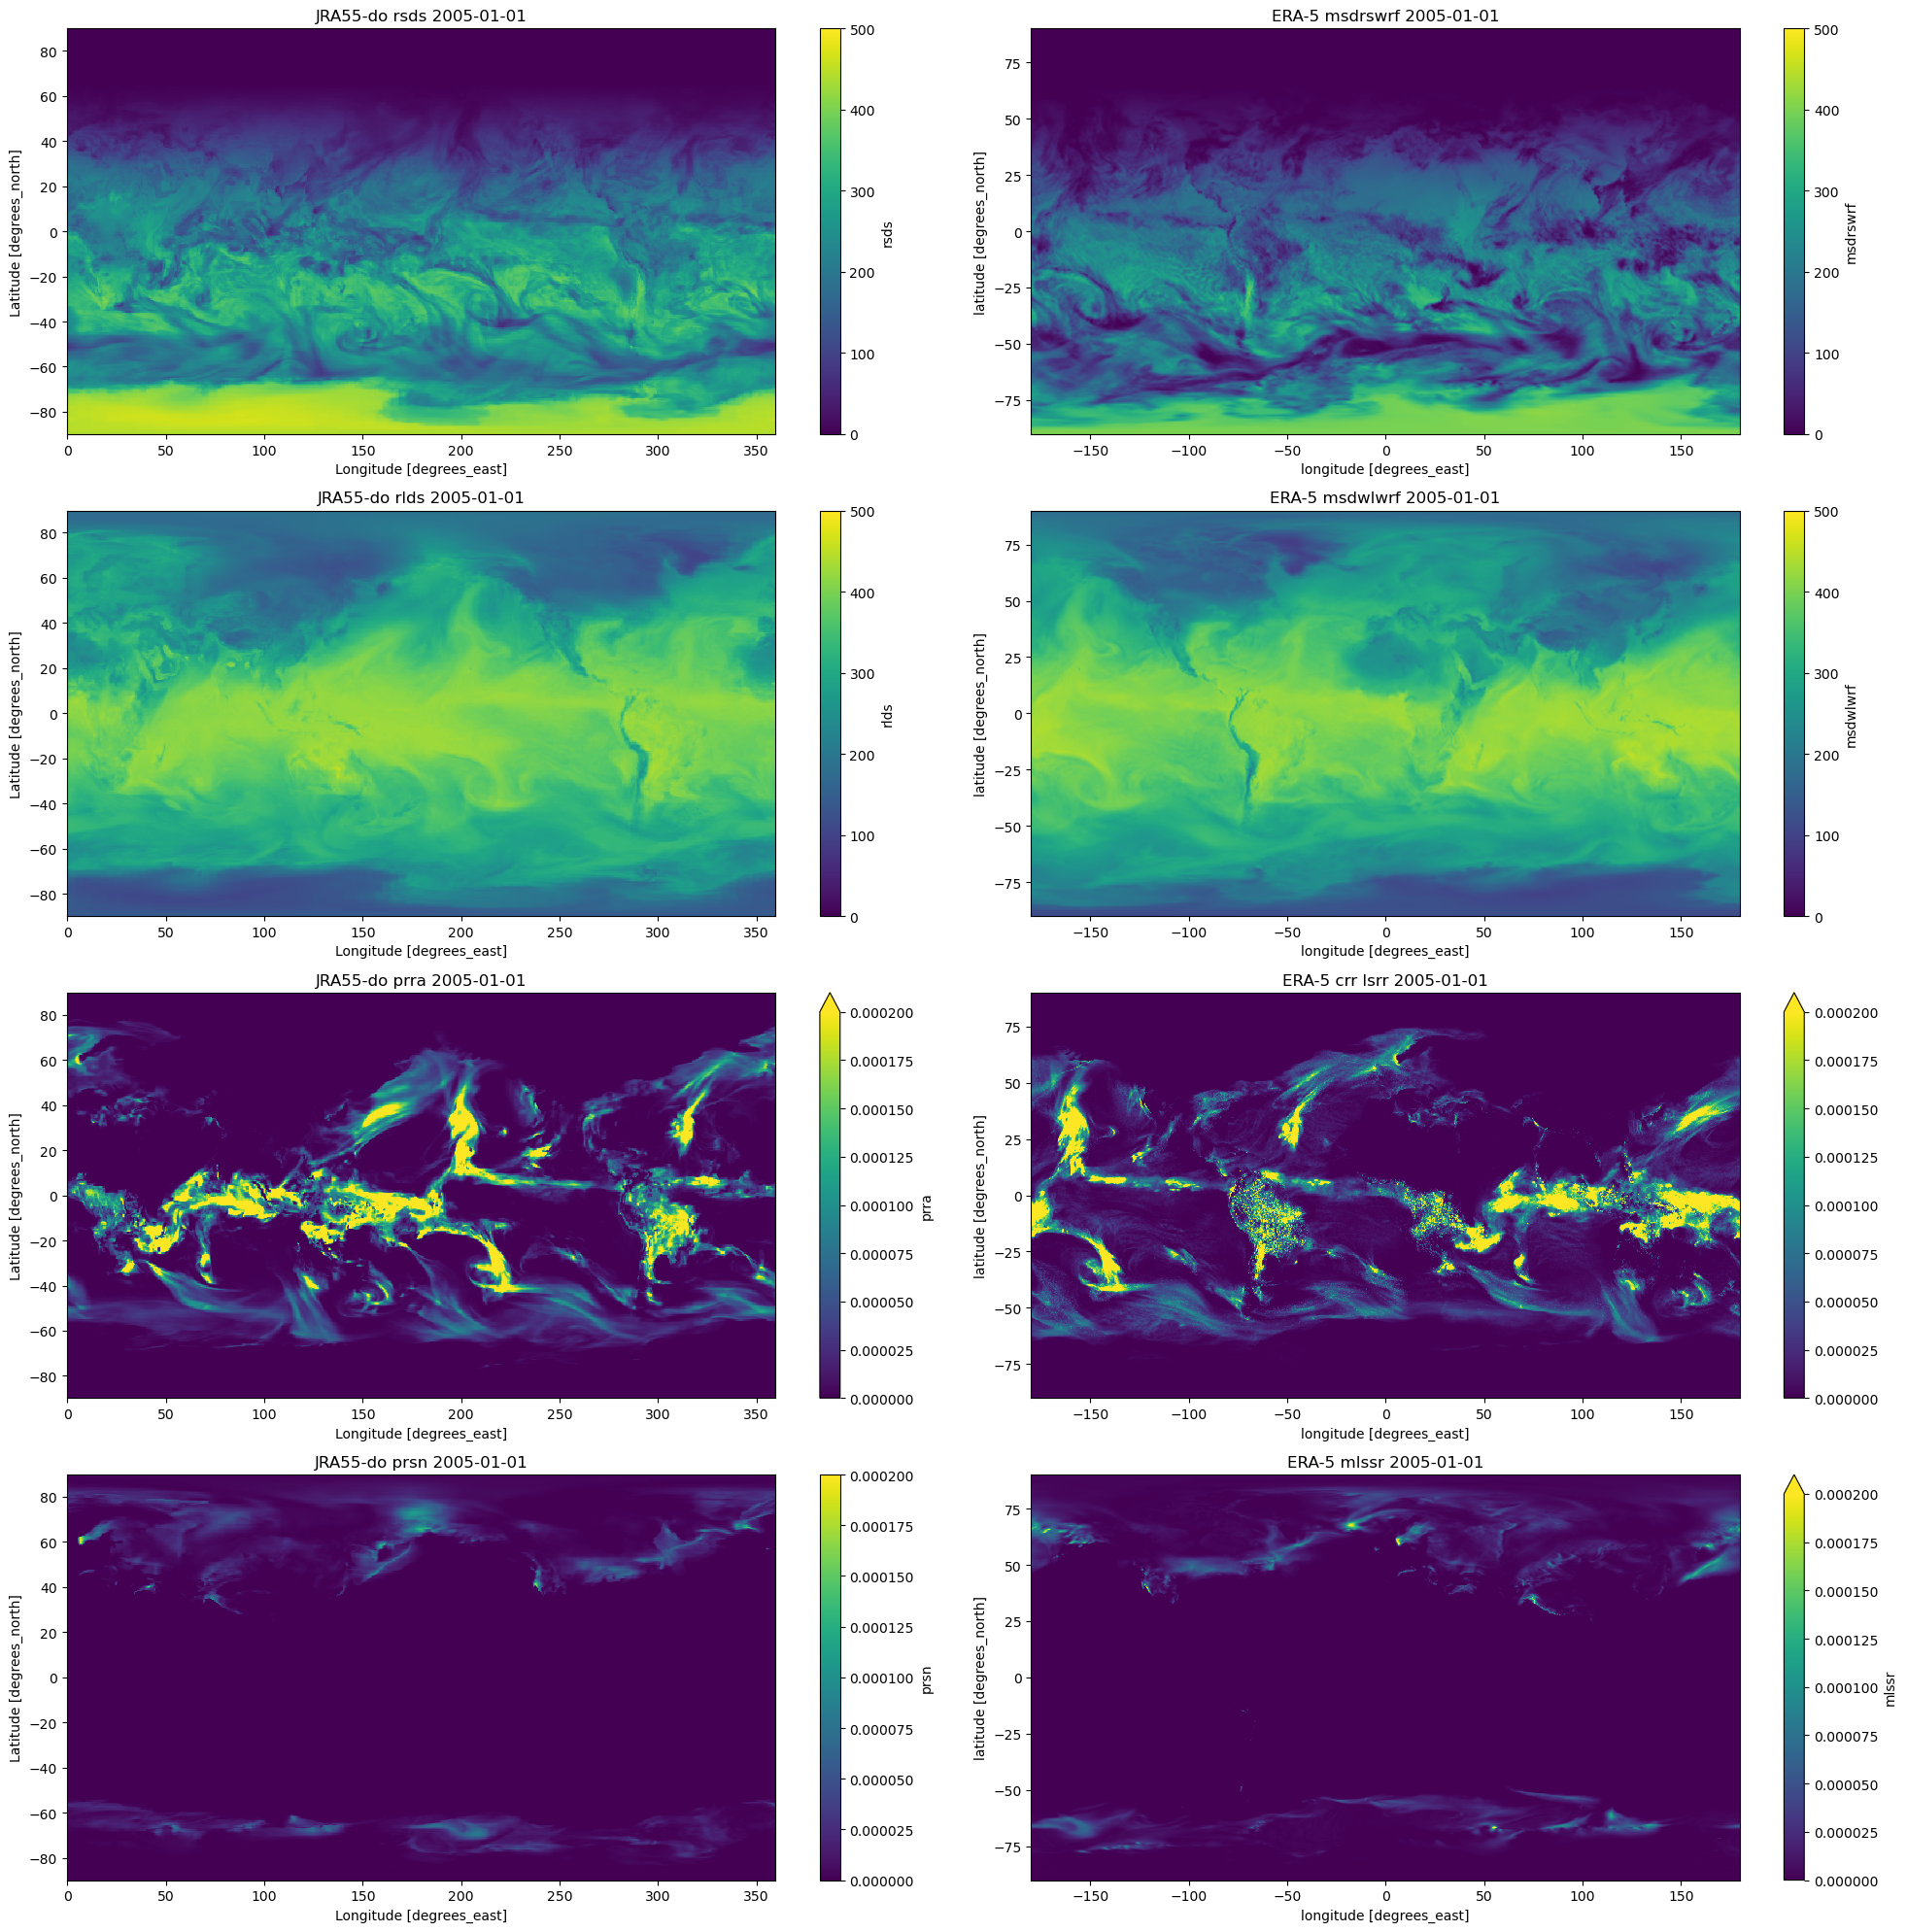

In [6]:
fig, axes = plt.subplots(figsize=(20,20),nrows=4,ncols=2)

i = 0
keys = ['swfld','lwfld','rain','snow']
var = variables[keys[i]]
dsJRA = xr.open_mfdataset(sorted(glob.glob(JRAbase + var['JRA'] + '/gr/v20200916/' + var['JRA'] + '_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_' + str(year) + '*.nc')))[var['JRA']]
dsERA = xr.open_mfdataset(sorted(glob.glob(ERAbase + var['ERA'] + '/' + str(year) + '/' + var['ERA'] + '_era5_oper_sfc_' + str(year) + '*.nc')))[var['ERA']] 
dsJRA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][0],vmin=var['vmin'],vmax=var['vmax'])
dsERA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][1],vmin=var['vmin'],vmax=var['vmax'])
axes[i][0].set_title('JRA55-do ' + var['JRA'] + ' ' + str(year) + '-01-01')
axes[i][1].set_title('ERA-5 ' + var['ERA'] + ' ' + str(year) + '-01-01')

i = 1
var = variables[keys[i]]
dsJRA = xr.open_mfdataset(sorted(glob.glob(JRAbase + var['JRA'] + '/gr/v20200916/' + var['JRA'] + '_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_' + str(year) + '*.nc')))[var['JRA']]
dsERA = xr.open_mfdataset(sorted(glob.glob(ERAbase + var['ERA'] + '/' + str(year) + '/' + var['ERA'] + '_era5_oper_sfc_' + str(year) + '*.nc')))[var['ERA']] 
dsJRA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][0],vmin=var['vmin'],vmax=var['vmax'])
dsERA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][1],vmin=var['vmin'],vmax=var['vmax'])
axes[i][0].set_title('JRA55-do ' + var['JRA'] + ' ' + str(year) + '-01-01')
axes[i][1].set_title('ERA-5 ' + var['ERA'] + ' ' + str(year) + '-01-01')

i = 2
var = variables[keys[i]]
dsJRA = xr.open_mfdataset(sorted(glob.glob(JRAbase + var['JRA'] + '/gr/v20200916/' + var['JRA'] + '_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_' + str(year) + '*.nc')))[var['JRA']]
dsERA1 = xr.open_mfdataset(sorted(glob.glob(ERAbase + var['ERA'][0] + '/' + str(year) + '/' + var['ERA'][0] + '_era5_oper_sfc_' + str(year) + '*.nc')))[var['ERA'][0]] 
dsERA2 = xr.open_mfdataset(sorted(glob.glob(ERAbase + var['ERA'][1] + '/' + str(year) + '/' + var['ERA'][1] + '_era5_oper_sfc_' + str(year) + '*.nc')))[var['ERA'][1]] 
dsJRA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][0],vmin=var['vmin'],vmax=var['vmax'])
(dsERA1.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time')+dsERA2.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time')).plot(ax=axes[i][1],vmin=var['vmin'],vmax=var['vmax'])
axes[i][0].set_title('JRA55-do ' + var['JRA'] + ' ' + str(year) + '-01-01')
axes[i][1].set_title('ERA-5 ' + var['ERA'][0] + ' ' + var['ERA'][1] + ' ' + str(year) + '-01-01')

i = 3
var = variables[keys[i]]
dsJRA = xr.open_mfdataset(sorted(glob.glob(JRAbase + var['JRA'] + '/gr/v20200916/' + var['JRA'] + '_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_' + str(year) + '*.nc')))[var['JRA']]
dsERA = xr.open_mfdataset(sorted(glob.glob(ERAbase + var['ERA'] + '/' + str(year) + '/' + var['ERA'] + '_era5_oper_sfc_' + str(year) + '*.nc')))[var['ERA']] 
dsJRA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][0],vmin=var['vmin'],vmax=var['vmax'])
dsERA.sel(time=slice(str(year) + '-01-01',str(year) + '-01-02')).mean('time').plot(ax=axes[i][1],vmin=var['vmin'],vmax=var['vmax'])
axes[i][0].set_title('JRA55-do ' + var['JRA'] + ' ' + str(year) + '-01-01')
axes[i][1].set_title('ERA-5 ' + var['ERA'] + ' ' + str(year) + '-01-01')

plt.tight_layout()